# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

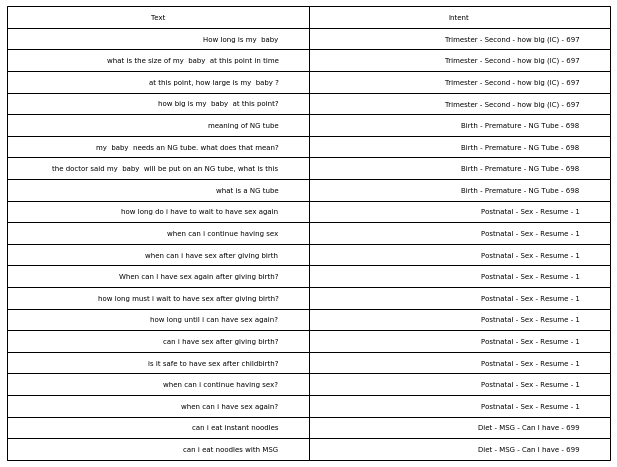

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
from text_classification.fast_text.model import FastTextWrapper
from text_classification.fast_text.train import FastTextLearner
from common.callbacks import PrintLoggerCallback

model = FastTextWrapper({'num_classes': num_classes})
learner = FastTextLearner(
    model,
    optimizer_fn='adam'
#     optimizer_fn='sgd',
#     optimizer_kwargs={'lr': 1e-2, 'momentum': .9}
)

In [9]:
learner.fit(
    training_data=(X_train, y_train), 
    epochs=100, 
    callbacks=[PrintLoggerCallback(log_every=5)]
)

3m 19s (- 63m 17s) (5 5%) - loss: 7.3063 - accuracy: 0.0000
6m 40s (- 60m 0s) (10 10%) - loss: 7.2635 - accuracy: 0.0000
10m 7s (- 57m 21s) (15 15%) - loss: 7.1976 - accuracy: 0.0000
13m 23s (- 53m 32s) (20 20%) - loss: 6.8530 - accuracy: 0.0000
16m 52s (- 50m 38s) (25 25%) - loss: 6.1136 - accuracy: 0.0625
20m 30s (- 47m 50s) (30 30%) - loss: 5.2032 - accuracy: 0.1250
24m 21s (- 45m 14s) (35 35%) - loss: 4.2832 - accuracy: 0.1875
29m 9s (- 43m 43s) (40 40%) - loss: 3.6128 - accuracy: 0.2500
32m 57s (- 40m 16s) (45 45%) - loss: 3.4124 - accuracy: 0.1875
37m 3s (- 37m 3s) (50 50%) - loss: 2.2932 - accuracy: 0.4375
41m 26s (- 33m 54s) (55 55%) - loss: 1.5798 - accuracy: 0.5000
45m 58s (- 30m 38s) (60 60%) - loss: 1.9830 - accuracy: 0.3750
50m 21s (- 27m 6s) (65 65%) - loss: 0.8154 - accuracy: 0.7500
54m 57s (- 23m 33s) (70 70%) - loss: 0.6414 - accuracy: 0.8125
59m 37s (- 19m 52s) (75 75%) - loss: 0.6238 - accuracy: 0.7500
64m 24s (- 16m 6s) (80 80%) - loss: 0.5369 - accuracy: 0.8750
68m

In [13]:
torch.topk(model(['the earth is flat']), 50)

(tensor([[0.1590, 0.1152, 0.0976, 0.0792, 0.0585, 0.0295, 0.0287, 0.0217, 0.0210,
          0.0184, 0.0172, 0.0167, 0.0163, 0.0154, 0.0119, 0.0113, 0.0103, 0.0100,
          0.0098, 0.0094, 0.0087, 0.0077, 0.0076, 0.0062, 0.0058, 0.0053, 0.0053,
          0.0053, 0.0053, 0.0050, 0.0046, 0.0046, 0.0044, 0.0043, 0.0040, 0.0040,
          0.0039, 0.0036, 0.0035, 0.0034, 0.0030, 0.0027, 0.0026, 0.0021, 0.0021,
          0.0019, 0.0018, 0.0018, 0.0017, 0.0017]]),
 tensor([[ 921,  750,  752,  569,  781, 1222,  590,    0,  962, 1324,  440, 1343,
           331,  474,  542, 1118, 1110,  115, 1221,   75,  931, 1409,  370,  655,
          1423,  695,  722,   92, 1401,  516,  123, 1113, 1081, 1172,  660,  718,
           392,  431,  261,  165, 1161,  444,  874,  196,  132,  406,   98,  513,
          1220,  681]]))

In [14]:
classes[921]

'Medical-VaricoseVeins-Legs'